# HW2_Matyukhina

In [180]:
import pandas as pd
import collections
import jsonlines
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import seaborn as sns

### 1. Датафрейм

#### 1.1 Считываем данные из файла и превращаем в датафрейм:

In [181]:
with jsonlines.open('analysed_pymorphy.jsonl') as parsed:
    anas = []
    for item in parsed:
        anas.append(item)

In [182]:
type(anas[2]['pos'])

str

In [183]:
df = pd.DataFrame(anas)
df

,lemma,word,pos
0,юрий,юрий,NOUN
1,иосифович,иосифович,NOUN
2,коваль,коваль,NOUN
3,.,.,None
4,приключение,приключения,NOUN
...,...,...,...
19634,16,16,None
19635,feb,feb,None
19636,2008,2008,None
19637,15:47:07,15:47:07,None


#### 1.2. Создаем столбец с "обобщенными" частями речи:

In [185]:
def change_pos(text):
    if text == 'GRND' or text == 'PRTF' or text == 'PRTS' or text == 'INFN':
        text = 'VERB'
    if text == 'ADJS' or text == 'ADJF':
        text = 'ADJ'
    if text == None:
        text = 'not defined'
    return text

In [193]:
df['new_pos'] = df['pos'].apply(change_pos)

In [197]:
df[df['pos'] == 'GRND']

,lemma,word,pos,new_pos,homophorms,len_word
166,распугивать,распугивая,GRND,VERB,False,распугивая
177,усесться,усевшись,GRND,VERB,False,усевшись
215,скосить,скосив,GRND,VERB,False,скосив
1043,указывать,указывая,GRND,VERB,False,указывая
1187,уверять,уверяя,GRND,VERB,False,уверяя
...,...,...,...,...,...,...
18881,глядеть,глядя,GRND,VERB,False,глядя
19200,прощаться,прощаясь,GRND,VERB,False,прощаясь
19238,выгружать,выгружая,GRND,VERB,False,выгружая
19248,улыбаться,улыбаясь,GRND,VERB,False,улыбаясь


#### 1.3. Cоздаем столбец с омоформами:

In [188]:
df['homophorms'] = df['lemma'] == df['word']

In [156]:
df.head(3)

,lemma,word,pos,new_pos,homophorms
0,юрий,юрий,NOUN,NOUN,True
1,иосифович,иосифович,NOUN,NOUN,True
2,коваль,коваль,NOUN,NOUN,True


### 2. Простые визуализации

#### 2.1. Столбчатая диаграмма

Столбчатые диаграммы нужны для представления категориальных данных по х и чисел по у. В нашем случае с ее помощью можно визуализировать, сколько раз та или иная часть речи встретилась в нашем тексте.

Text(0, 0.5, 'part of speech')

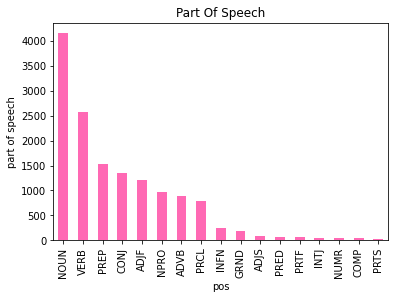

In [74]:
df['pos'].value_counts().plot.bar(color='hotpink')
plt.title('Part Of Speech Distribution')
plt.xlabel('pos')
plt.ylabel('number of tokens')

#### 2.2. Круговая диаграмма

Представим соотношений омоформ к не-омоформам

Text(0.5, 1.0, 'Share of homophorms')

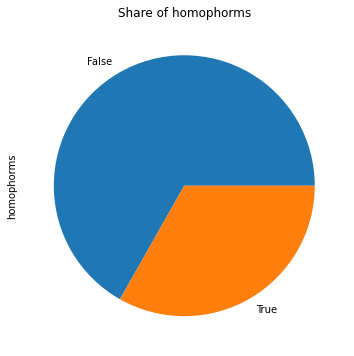

In [108]:
plt.figure(figsize=(6, 6))
df['homophorms'].value_counts().plot(kind='pie')
plt.title('Share of homophorms')

#### 2.3. Облако слов

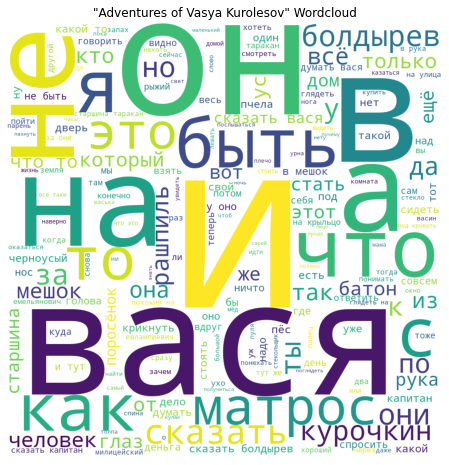

In [79]:
text = ' '.join(df['lemma'])
wordcloud = WordCloud(
    background_color ='white',
    width = 1000,
    height = 1000, 
).generate(text)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off") 
plt.title('"Adventures of Vasya Kurolesov" Wordcloud')
plt.show()

### 3. Сложные визуализации

#### 3.1. «Ящик с усами» длины слов, сгруппированных по части речи

In [198]:
def change_len(text):
    if type(text) == str: 
        text = len(text)
    return text

Создадим дополнительный столбец с расчетом длины слов:

In [199]:
df['len_word'] = df['word'].apply(change_len)

In [200]:
df.head(3)

,lemma,word,pos,new_pos,homophorms,len_word
0,юрий,юрий,NOUN,NOUN,True,4
1,иосифович,иосифович,NOUN,NOUN,True,9
2,коваль,коваль,NOUN,NOUN,True,6


Сгруппируем:

In [213]:
new_df = df[['word', 'pos', 'len_word']].groupby(['word', 'pos'], as_index=False).count()
new_df.columns = ['word', 'pos', 'total']
new_df = new_df[new_df['total'] > 100]

new_df

,word,pos,total
0,а,CONJ,176
110,болдырев,NOUN,103
202,в,PREP,410
236,вася,NOUN,296
1180,и,CONJ,579
1260,как,CONJ,112
1879,на,PREP,288
1997,не,PRCL,227
2256,он,NPRO,209
3391,с,PREP,107


Нарисуем боксплоты:

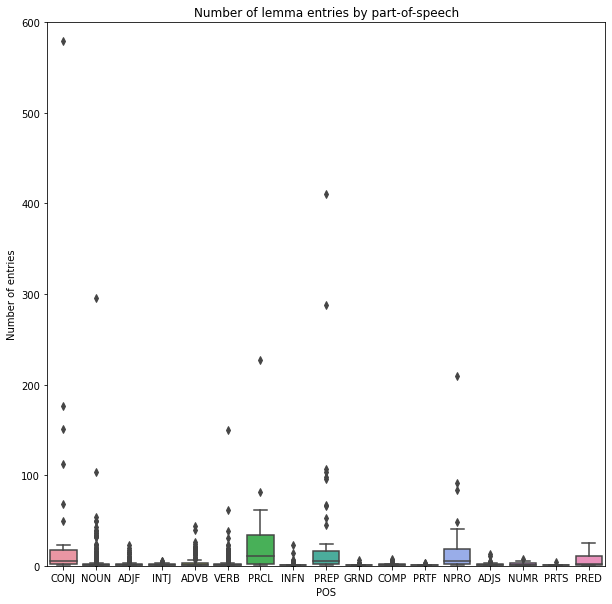

In [220]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="pos", y="total", data=df2)
plt.ylim((0, 600))
plt.title('Number of lemma entries by part-of-speech')
plt.ylabel('Number of entries')
plt.xlabel('POS');